# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

### Short explanation of Pros and cons of the two representations:

- #### Histogram Pros:

    This graph is showing us how the data is distributed and it is also showing that the data is skewed towards the lower values. This also shows there could be outliers(heavy tails) in the graph
    This graph is showing us frequency distribution clearly 
    The bins show how many drugs are priced in each of the bins
    It also shows the major number of drugs are priced within 15 dollars
    It also shows there could be outliers in the price ranges 40 and above
  
- #### Histogram Cons:

    The graph does not convey the story as it lacks title and labels

    The legend just says Data but it does not say what it is

    It does not show the Mean or the median of the data

    It does not show the prices at which we can call it outliers

    The graph does not show the prices where most of the drug starts at as the first Bin covers the whole range 

- #### Boxplot Pros:

    This graph is showing us what median is about 7.5- 8 dollar range
    
    The graph is showing us the various quartiles clearly 
    
    The majority of the drugs are priced between approximately 4 dollar to 15 dollar(by visual inspection)
   
    There are no outliers in the lower side( there arte no outlier bubble below the lower whisker)
   
    There are outliers approximately above dollar 35-36 range and there are multiple outliers which are priced pretty high and the max price looks to be around 56 dollar. It also shows other outlier drug prices clearly

- #### Boxplot Cons:

    The graph does not convey the story as it lacks title and labels, doesnt say what each of the lines are indicating
    
    The legend just says Data but it does not say what it is
    
    The distribution is properly showing in the histogram but not on this chart 
    
    To a business user this chart is more difficult to understand compared to the histogram in its current form (proper labeling missing)
    
#### Conclusion:  

Both the chart complement each other but still lacks other details needed. In its current form since I am analyzing and I understand both the given grpah I will go with the box plot.

### Modifications to the formatting to make it more visually interesting, clear, or informative:

Histogram :
- Add a title to the graph (Distribution of Drug Prices)
- Add x label(price in dollars) and y axis labels (drug frequency)
- Add a legend to the graph (drug prices)
- I will add a kde plot to the histogram to show the distribution of the drug prices better
- Add the Mean , median and Outlier marker lines(vertical lines) to the graph to show the price ranges of the drugs
- Add the quartile values to the graph to the quartile ranges

Boxplot:
- Add a title to the graph (Distribution of Drug Prices)
- Add x label(price in dollars) and y axis labels (drug frequency)
- 



  

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

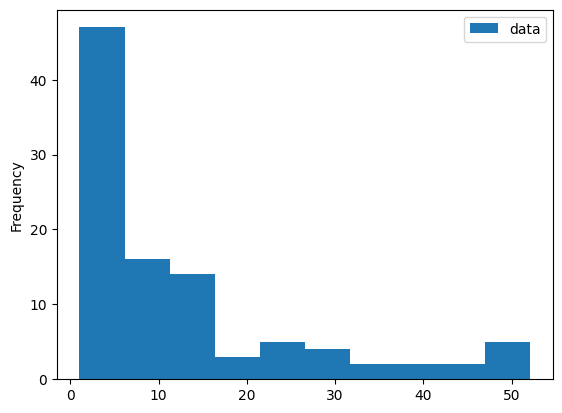

In [295]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

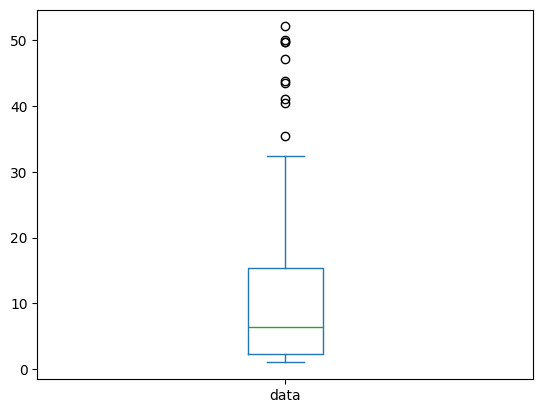

In [296]:
df.plot.box()

### Here is how I will represent the data in a better way for users to interpret easily

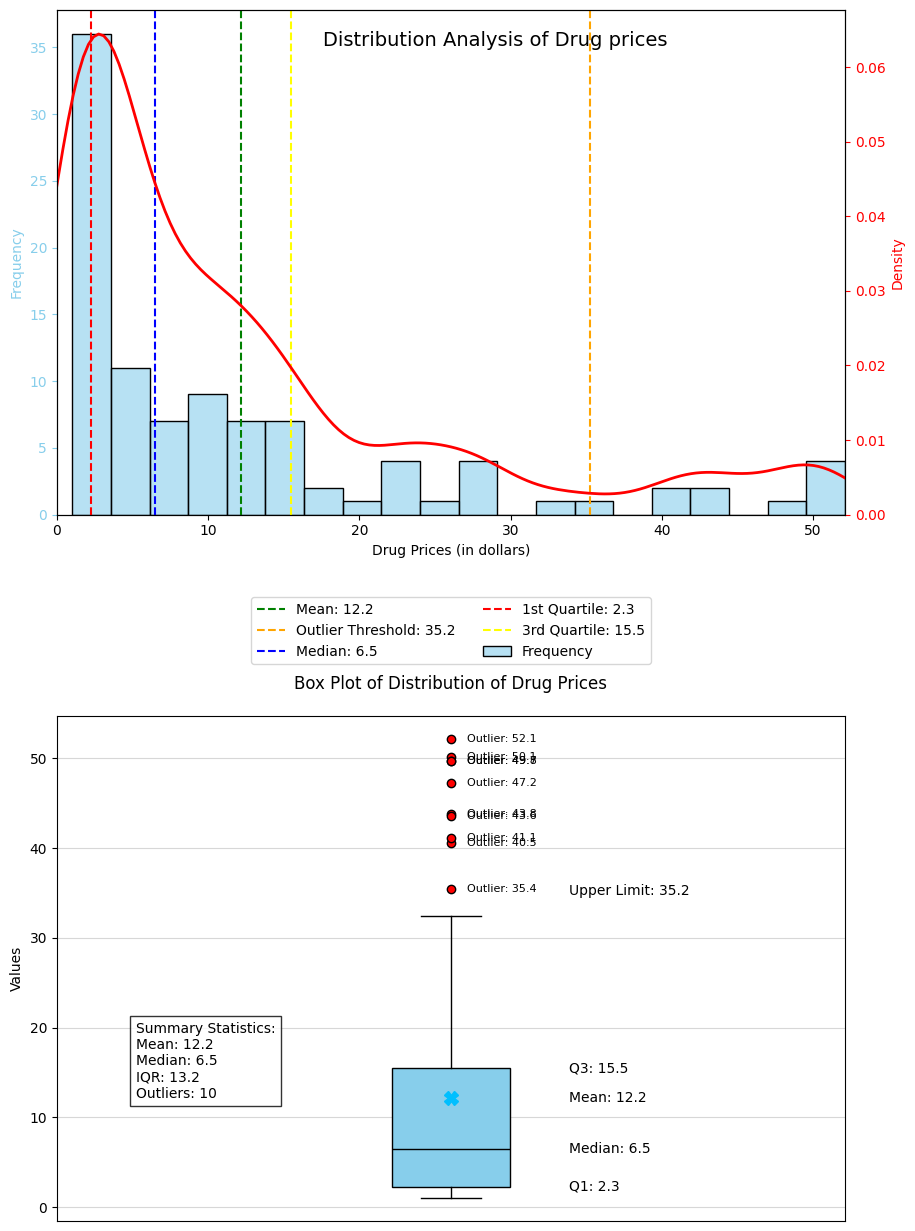

In [297]:
# sns imported previously no need now 
# random data generation
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

#  key statistics calculate 
stats = df['data'].describe()
q1, q2, q3 = stats['25%'], stats['50%'], stats['75%']
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr

# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
fig.suptitle('Distribution Analysis of Drug prices', fontsize=14, y=0.95)

# twin axis for histogram to show frequency on lef t and density on right side else the density value being so low not able to shwo the values
#  https://stackoverflow.com/questions/37461434/seaborn-despine-with-two-y-scales-twinx
ax1_twin = ax1.twinx()

# histogram with frequency on primary y-axis
sns.histplot(data=df, x='data', bins=20, ax=ax1, color='skyblue', 
            alpha=0.6, stat='count', label='Frequency')

#  KDE on secondary y-axis
sns.kdeplot(data=df, x='data', ax=ax1_twin, color='red', linewidth=2, 
            label='Density', bw_adjust=0.5)

# Add vwertical lines for key statistics
stats_line = ax1.axvline(stats['mean'], color='green', linestyle='--', 
                        label=f'Mean: {stats["mean"]:.1f}')
outlier_line = ax1.axvline(outlier_threshold, color='orange', linestyle='--', 
                          label=f'Outlier Threshold: {outlier_threshold:.1f}')
median_line = ax1.axvline(q2, color='blue', linestyle='--', 
                         label=f'Median: {q2:.1f}')
q1_line = ax1.axvline(q1, color='red', linestyle='--', 
                      label=f'1st Quartile: {q1:.1f}')
q3_line = ax1.axvline(q3, color='yellow', linestyle='--', 
                      label=f'3rd Quartile: {q3:.1f}')

# Add axes labels first subplot
ax1.set_xlabel('Drug Prices (in dollars)')
ax1.set_ylabel('Frequency', color='skyblue')
ax1_twin.set_ylabel('Density', color='red')
ax1.tick_params(axis='y', colors='skyblue')
ax1_twin.tick_params(axis='y', colors='red')
ax1.set_xlim(0, df['data'].quantile(1))    # adding this to limit the kde graph else its stretching the graph without data both on left and right

# position label at the bottom of the graph
ax1.legend( bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# create box plot in second subplot
bp = ax2.boxplot(df['data'], patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color="black"),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6))

# add the labels for key stats
ax2.text(1.15, q3, f'Q3: {q3:.1f}', verticalalignment='center')
ax2.text(1.15, q2, f'Median: {q2:.1f}', verticalalignment='center')
ax2.text(1.15, q1, f'Q1: {q1:.1f}', verticalalignment='center')

# set the plot mean as a blue X
ax2.plot(1, stats['mean'], 'X', color = '#00BFFF', markersize=10, label='Mean')
ax2.text(1.15, stats['mean'], f'Mean: {stats["mean"]:.1f}', verticalalignment='center')

# add labels for the upper whisker  
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
ax2.text(1.15, upper_whisker, f'Upper Limit: {upper_whisker:.1f}', verticalalignment='center')

# Label outliers
outliers = [x for x in df['data'] if x > upper_whisker ]
for outlier in outliers:
    ax2.text(1.02, outlier, f'Outlier: {outlier:.1f}', 
             verticalalignment='center', fontsize=8)

# Customize box plot
ax2.set_title('Box Plot of Distribution of Drug Prices', pad=20)
ax2.set_ylabel('Values')
ax2.grid(True, alpha=0.5)
ax2.set_xticks([])

#  print summary statistics in box plot 
stats_text = (f'Summary Statistics:\n'
             f'Mean: {stats["mean"]:.1f}\n'
             f'Median: {q2:.1f}\n'
             f'IQR: {iqr:.1f}\n'
             f'Outliers: {len(outliers)}')

ax2.text(0.6, stats['mean'], stats_text, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))


plt.tight_layout()
plt.subplots_adjust(right=0.85, bottom=0.1, hspace=0.4)
plt.show()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

##  Importing the favorita notebook (this is last semester identified by my team mate ) and I created the dataframes now to use for analysis
OMDS-ModB2-Week2-Halder-Deb  which I had done the EDA for the Walmart so I can use that data set  and reuse my previously created dataset

In [298]:
%run "Favorita Stores.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
It worked!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date 

In [299]:
final_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,0,0.000,0,Quito,Pichincha,D,13,NaN,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,1,0.000,0,Quito,Pichincha,D,13,NaN,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,2,0.000,0,Quito,Pichincha,D,13,NaN,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,3,0.000,0,Quito,Pichincha,D,13,NaN,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,4,0.000,0,Quito,Pichincha,D,13,NaN,67.714366,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,28,438.133,0,Quito,Pichincha,B,6,2155.0,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,29,154.553,1,Quito,Pichincha,B,6,2155.0,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,30,2419.729,148,Quito,Pichincha,B,6,2155.0,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,31,121.000,8,Quito,Pichincha,B,6,2155.0,47.570000,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [300]:
final_df["sales"].describe([1/3 ,2/3])

count    3.054348e+06
mean     3.590209e+02
std      1.107286e+03
min      0.000000e+00
33.3%    1.000000e+00
50%      1.100000e+01
66.7%    8.951367e+01
max      1.247170e+05
Name: sales, dtype: float64

In [301]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        int64         
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  transactions  float64       
 11  dcoilwtico    float64       
 12  type_y        object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 396.1+ MB


In [302]:
def plot_numeric_features(df):
    # plot histograms for sales and onpromotion in scale of 10,000
    scale_factor = 10000
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # sales distribution
    daily_sales = df.groupby('date')['sales'].sum() / scale_factor
    sns.histplot(data=daily_sales, bins=50, ax=axes[0])
    axes[0].set_title('Distribution of Daily Sales (in 10,000s)')
    axes[0].set_xlabel('Daily Sales (× 10,000)')
    axes[0].set_ylabel('Count')
    
    # on promotion distribution 
    daily_promo = df.groupby('date')['onpromotion'].sum() / scale_factor
    sns.histplot(data=daily_promo, bins=30, ax=axes[1])
    axes[1].set_title('Distribution of Daily Items on Promotion (in 10,000s)')
    axes[1].set_xlabel('Number of Items on Promotion (× 10,000)')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

    #  summary statistics for promotions
    print("\nPromotion Summary Statistics (in 10,000s):")
    print("-" * 50)
    print(f"Mean Daily Items on Promotion: {daily_promo.mean():.2f}")
    print(f"Median Daily Items on Promotion: {daily_promo.median():.2f}")
    print(f"Max Daily Items on Promotion: {daily_promo.max():.2f}")

def plot_categorical_features(df, cat_cols):
    # bar plots for categorical columns
    n_cols = len(cat_cols)
    n_rows = (n_cols + 1) // 2  # 2 plots per row
    
    for i in range(0, n_cols, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
        # first plot
        value_counts = df[cat_cols[i]].value_counts().sort_index()
        sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[0])
        axes[0].set_title(f'Distribution of {cat_cols[i]}')
        axes[0].set_xlabel(cat_cols[i])
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        # second plot (if available)
        if i + 1 < n_cols:
            value_counts = df[cat_cols[i+1]].value_counts().sort_index()
            sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[1])
            axes[1].set_title(f'Distribution of {cat_cols[i+1]}')
            axes[1].set_xlabel(cat_cols[i+1])
            axes[1].set_ylabel('Count')
            axes[1].tick_params(axis='x', rotation=45)
        else:
            fig.delaxes(axes[1])
            
        plt.tight_layout()
        plt.show()

def plot_datetime_feature(df, datetime_col):
    # plot time bases features
    fig = plt.figure(figsize=(20, 15))
    # change the scale factor so the graoh doesnt show in millions
    scale_factor = 10000
    
    # by year
    plt.subplot(311)
    year_sales = df.groupby(df[datetime_col].dt.year)['sales'].sum() / scale_factor
    year_sales.plot(kind='bar')
    plt.title('Total Sales by Year (in 10,000s)')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (× 10,000)')
    
    # by month
    plt.subplot(312)
    month_sales = df.groupby(df[datetime_col].dt.month)['sales'].sum() / scale_factor
    month_sales.plot(kind='bar')
    plt.title('Total Sales by Month (in 10,000s)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (× 10,000)')
    
    # by day of week
    plt.subplot(313)
    day_sales = df.groupby(df[datetime_col].dt.day_name())['sales'].sum() / scale_factor
    day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                      'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
    plt.title('Total Sales by Day of Week (in 10,000s)')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Sales (× 10,000)')
    
    plt.tight_layout()
    plt.show()

def create_histograms_dataset(df):
    #create histogram for selected data columns and types
    scale_factor = 10000
    
    categorical_cols = ['city', 'state', 'type_x', 'type_y', 'locale', 
                       'locale_name', 'transferred']
    
    datetime_col = 'date'
    
    print("=== Sales and Promotion Distributions ===")
    plot_numeric_features(df)
    
    print("\n=== Categorical Features ===")
    plot_categorical_features(df, categorical_cols)
    
    print("\n=== DateTime Feature ===")
    plot_datetime_feature(df, datetime_col)

    # Create a figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Total Sales by Store Type
    store_sales = df.groupby('type_x')['sales'].sum() / scale_factor
    store_sales.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Total Sales by Store Type (in 10,000s)')
    axes[0].set_ylabel('Total Sales (× 10,000)')
    axes[0].tick_params(axis='x', rotation=45)
    
    # sales by cluster
    cluster_sales = df.groupby('cluster')['sales'].sum() / scale_factor
    cluster_sales.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Total Sales by Cluster (in 10,000s)')
    axes[1].set_ylabel('Total Sales (× 10,000)')
    
    # total Items on promotion by Store Type
    promo_by_type = df.groupby('type_x')['onpromotion'].sum() / scale_factor
    promo_by_type.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Total Items on Promotion by Store Type (in 10,000s)')
    axes[2].set_ylabel('Total Items on Promotion (× 10,000)')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

=== Sales and Promotion Distributions ===


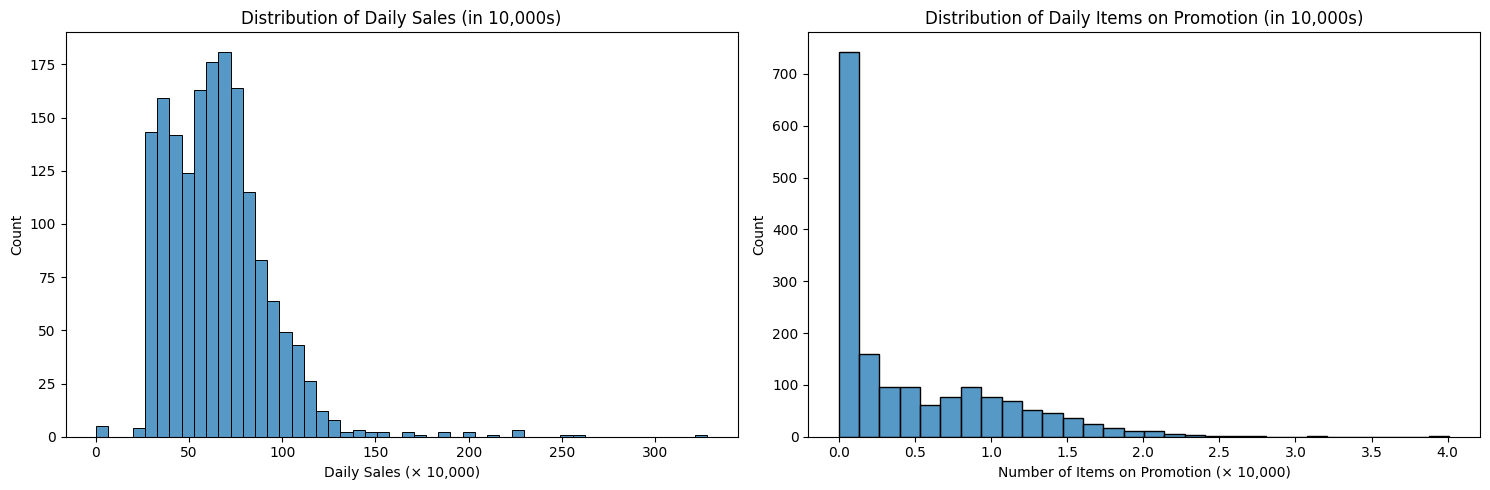


Promotion Summary Statistics (in 10,000s):
--------------------------------------------------
Mean Daily Items on Promotion: 0.47
Median Daily Items on Promotion: 0.23
Max Daily Items on Promotion: 4.01

=== Categorical Features ===


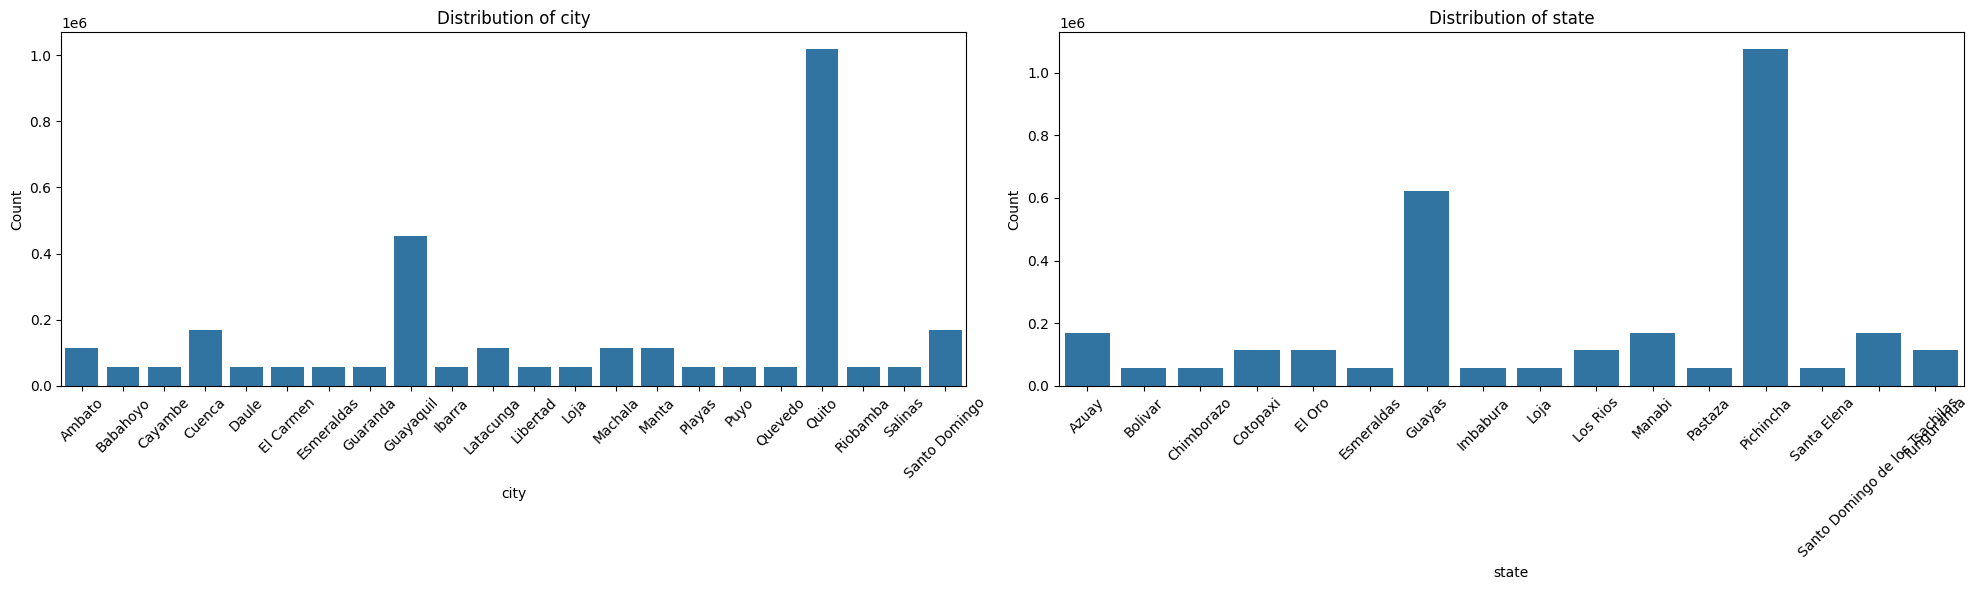

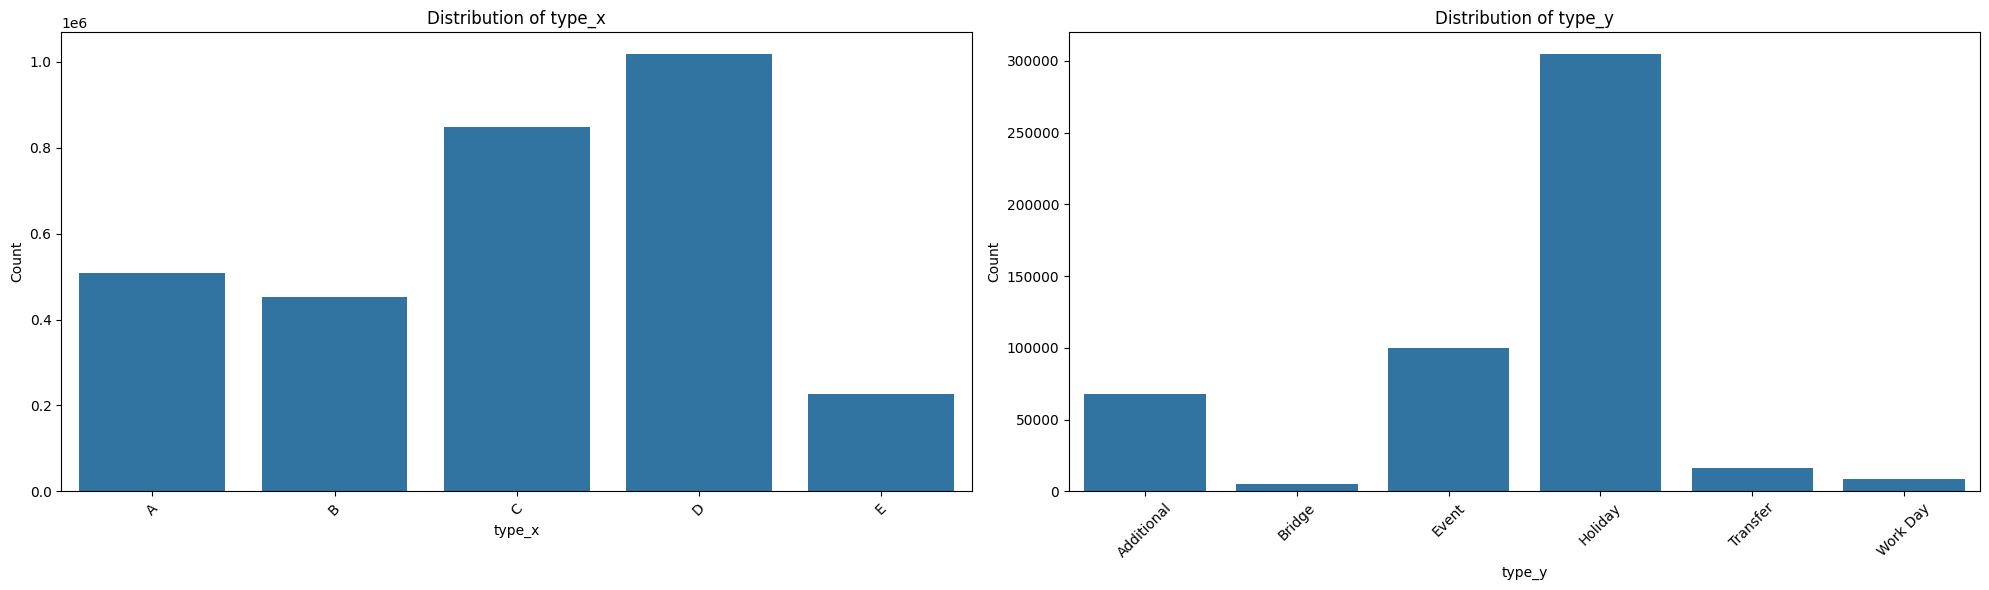

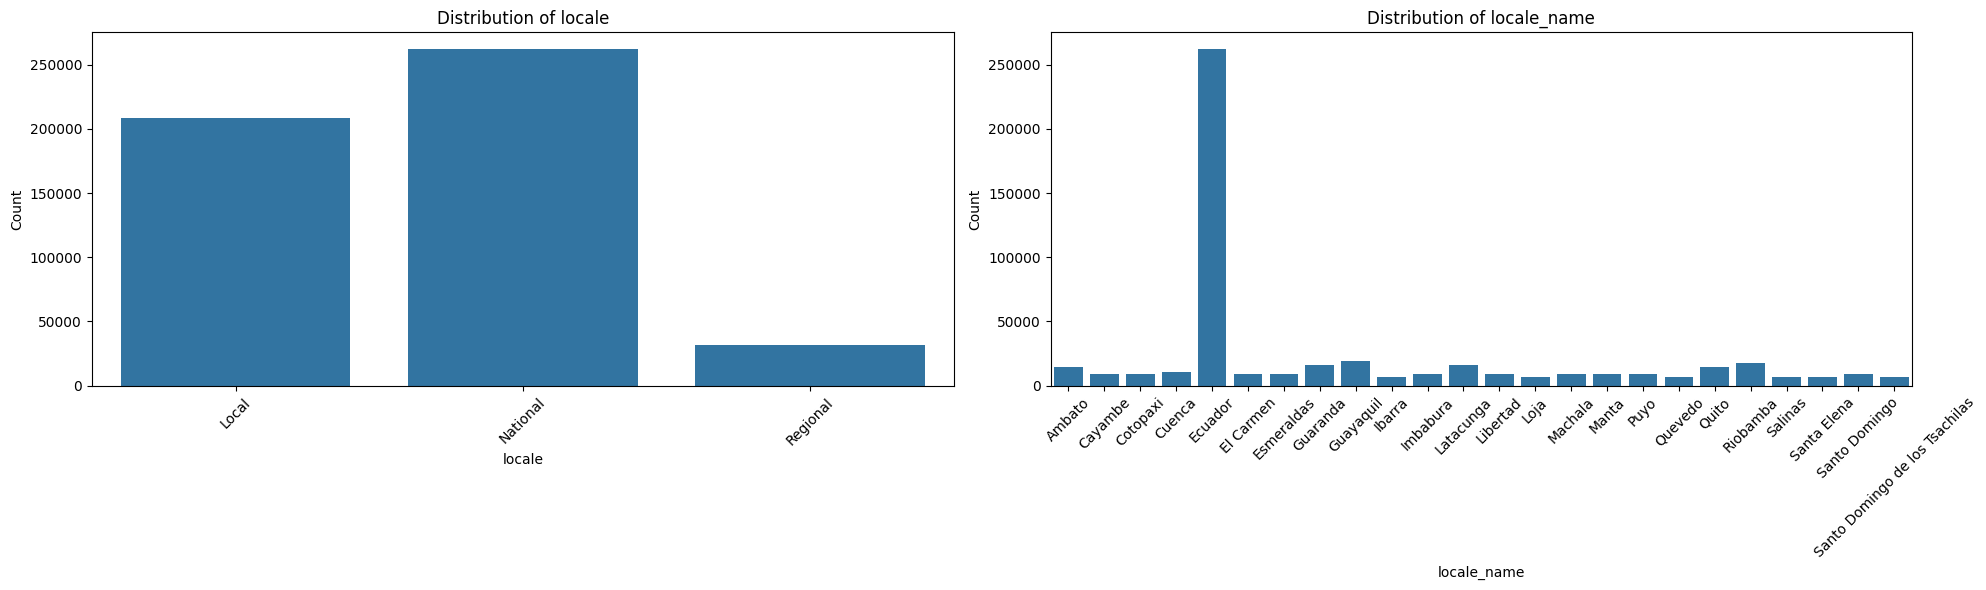

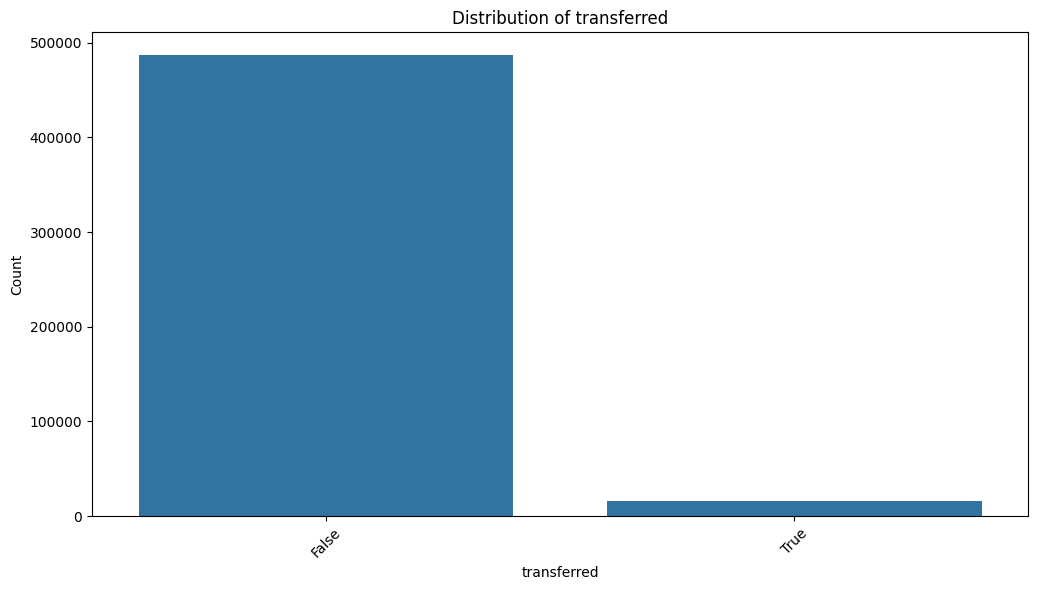


=== DateTime Feature ===


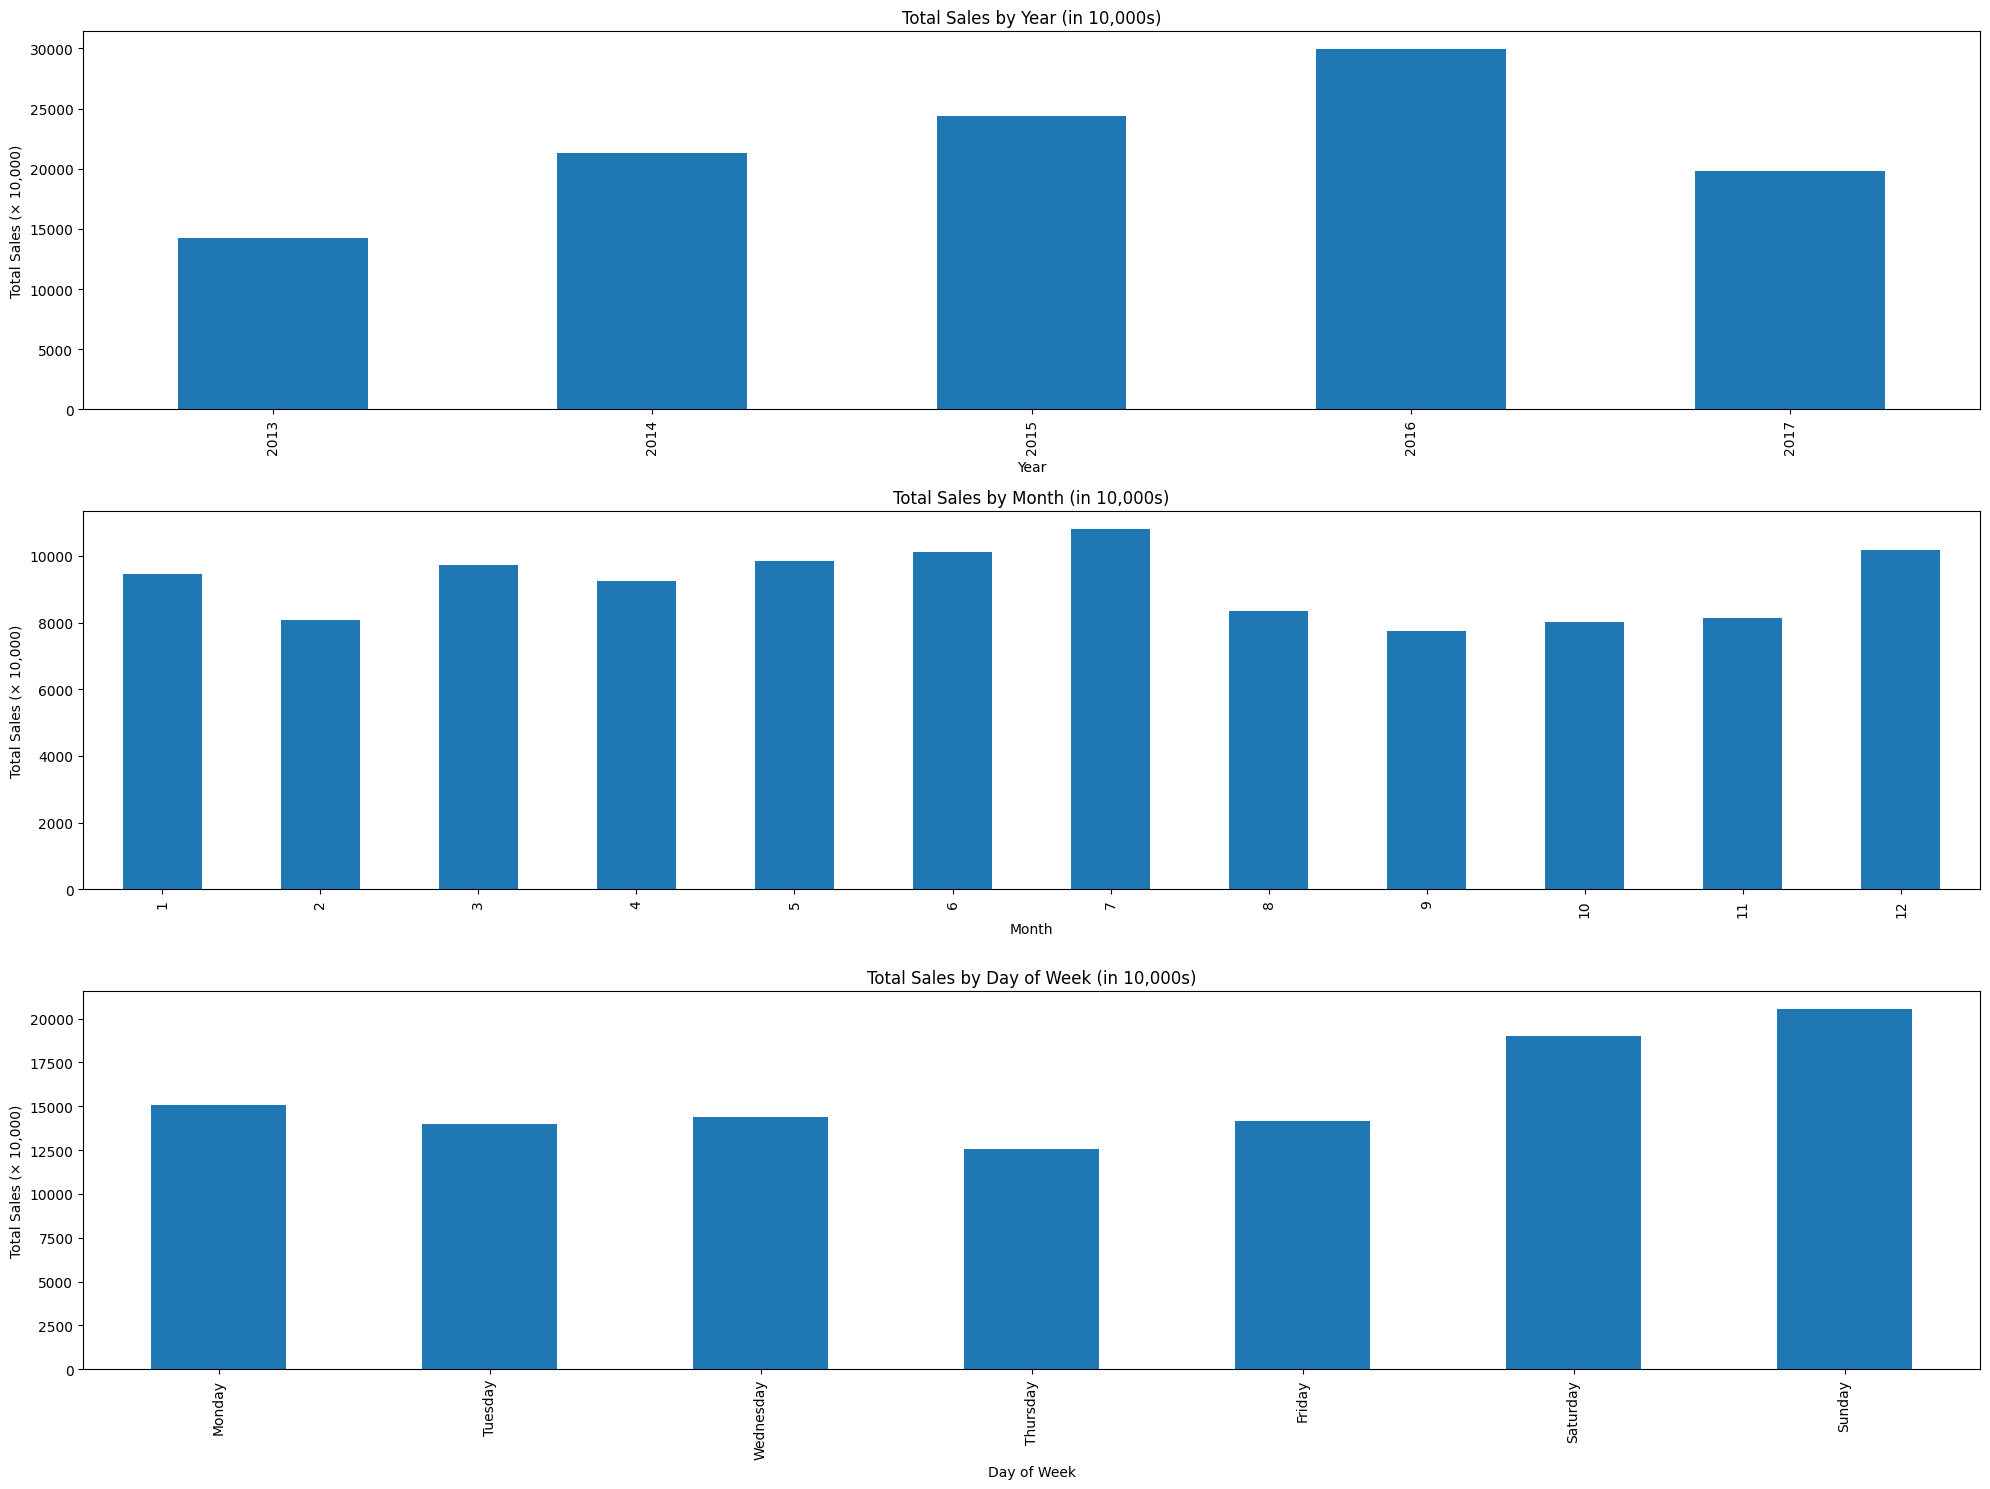

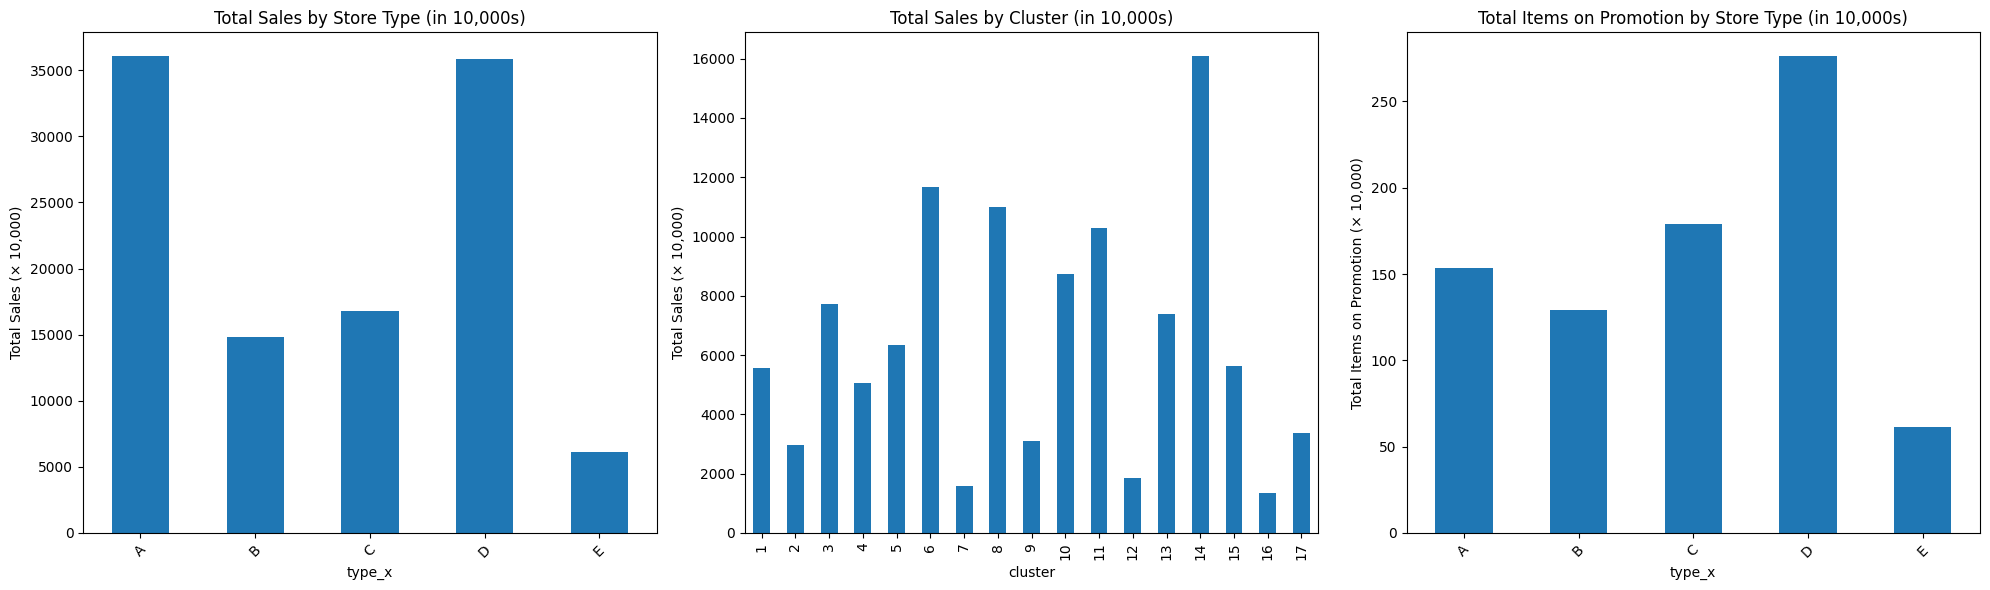

In [303]:
create_histograms_dataset(final_df)

### Draw KDE and Swarm plot


In [304]:
def plot_distributions(df):
    # now create KDE and Swarm plots
    # Scale factor for better visualization
    scale_factor = 10000
    
    # Create figure with multiple subplots
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 25))

   # swarm Plot - Sales by Store Type .. 3 plots in 3 rows
    plt.subplot(3, 1, 1)
    store_sales = df.groupby(['store_nbr', 'type_x'])['sales'].sum().reset_index()
    store_sales['sales'] = store_sales['sales'] / scale_factor
    sns.swarmplot(data=store_sales, x='type_x', y='sales')
    plt.title('Store Total Sales Distribution by Store Type (Swarm Plot)')
    plt.xlabel('Store Type')
    plt.ylabel('Total Sales (× 10,000)')
    plt.xticks(rotation=45)

    # KDE Plot - Sales Distribution by Year
    plt.subplot(3, 1, 2)
    df['year'] = df['date'].dt.year
    yearly_sales = df.groupby(['year', 'store_nbr'])['sales'].sum().reset_index()
    yearly_sales['sales'] = yearly_sales['sales'] / scale_factor
    sns.kdeplot(data=yearly_sales, x='sales', hue='year')
    plt.title('Yearly Sales Distribution by Store (KDE Plot)')
    plt.xlabel('Total Sales (× 10,000)')
    plt.ylabel('Density')

    # violin Plot - Sales by Cluster
    plt.subplot(3, 1, 3)
    cluster_sales = df.groupby(['store_nbr', 'cluster'])['sales'].sum().reset_index()
    cluster_sales['sales'] = cluster_sales['sales'] / scale_factor
    sns.violinplot(data=cluster_sales, x='cluster', y='sales')
    plt.title('Store Sales Distribution by Cluster (Violin Plot)')
    plt.xlabel('Cluster')
    plt.ylabel('Total Sales (× 10,000)')

    plt.tight_layout()
    plt.show()

def plot_violin_sales_by_dayofweek(df):
    #set scale
    scale_factor = 10000
    
    plt.figure(figsize=(15, 6))
    df['day_of_week'] = df['date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_sales = df.groupby(['date', 'day_of_week'])['sales'].sum().reset_index()
    daily_sales['sales'] = daily_sales['sales'] / scale_factor
    sns.violinplot(data=daily_sales, x='day_of_week', y='sales', order=day_order)
    plt.title('Daily Sales Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Daily Total Sales (× 10,000)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # printy summary statistics
    print("\nSummary Statistics:")
    print("-" * 50)
    print("\nTop 5 Store Types by Average Sales:")
    store_type_stats = df.groupby('type_x')['sales'].mean().sort_values(ascending=False).head()
    print(store_type_stats / scale_factor)
    

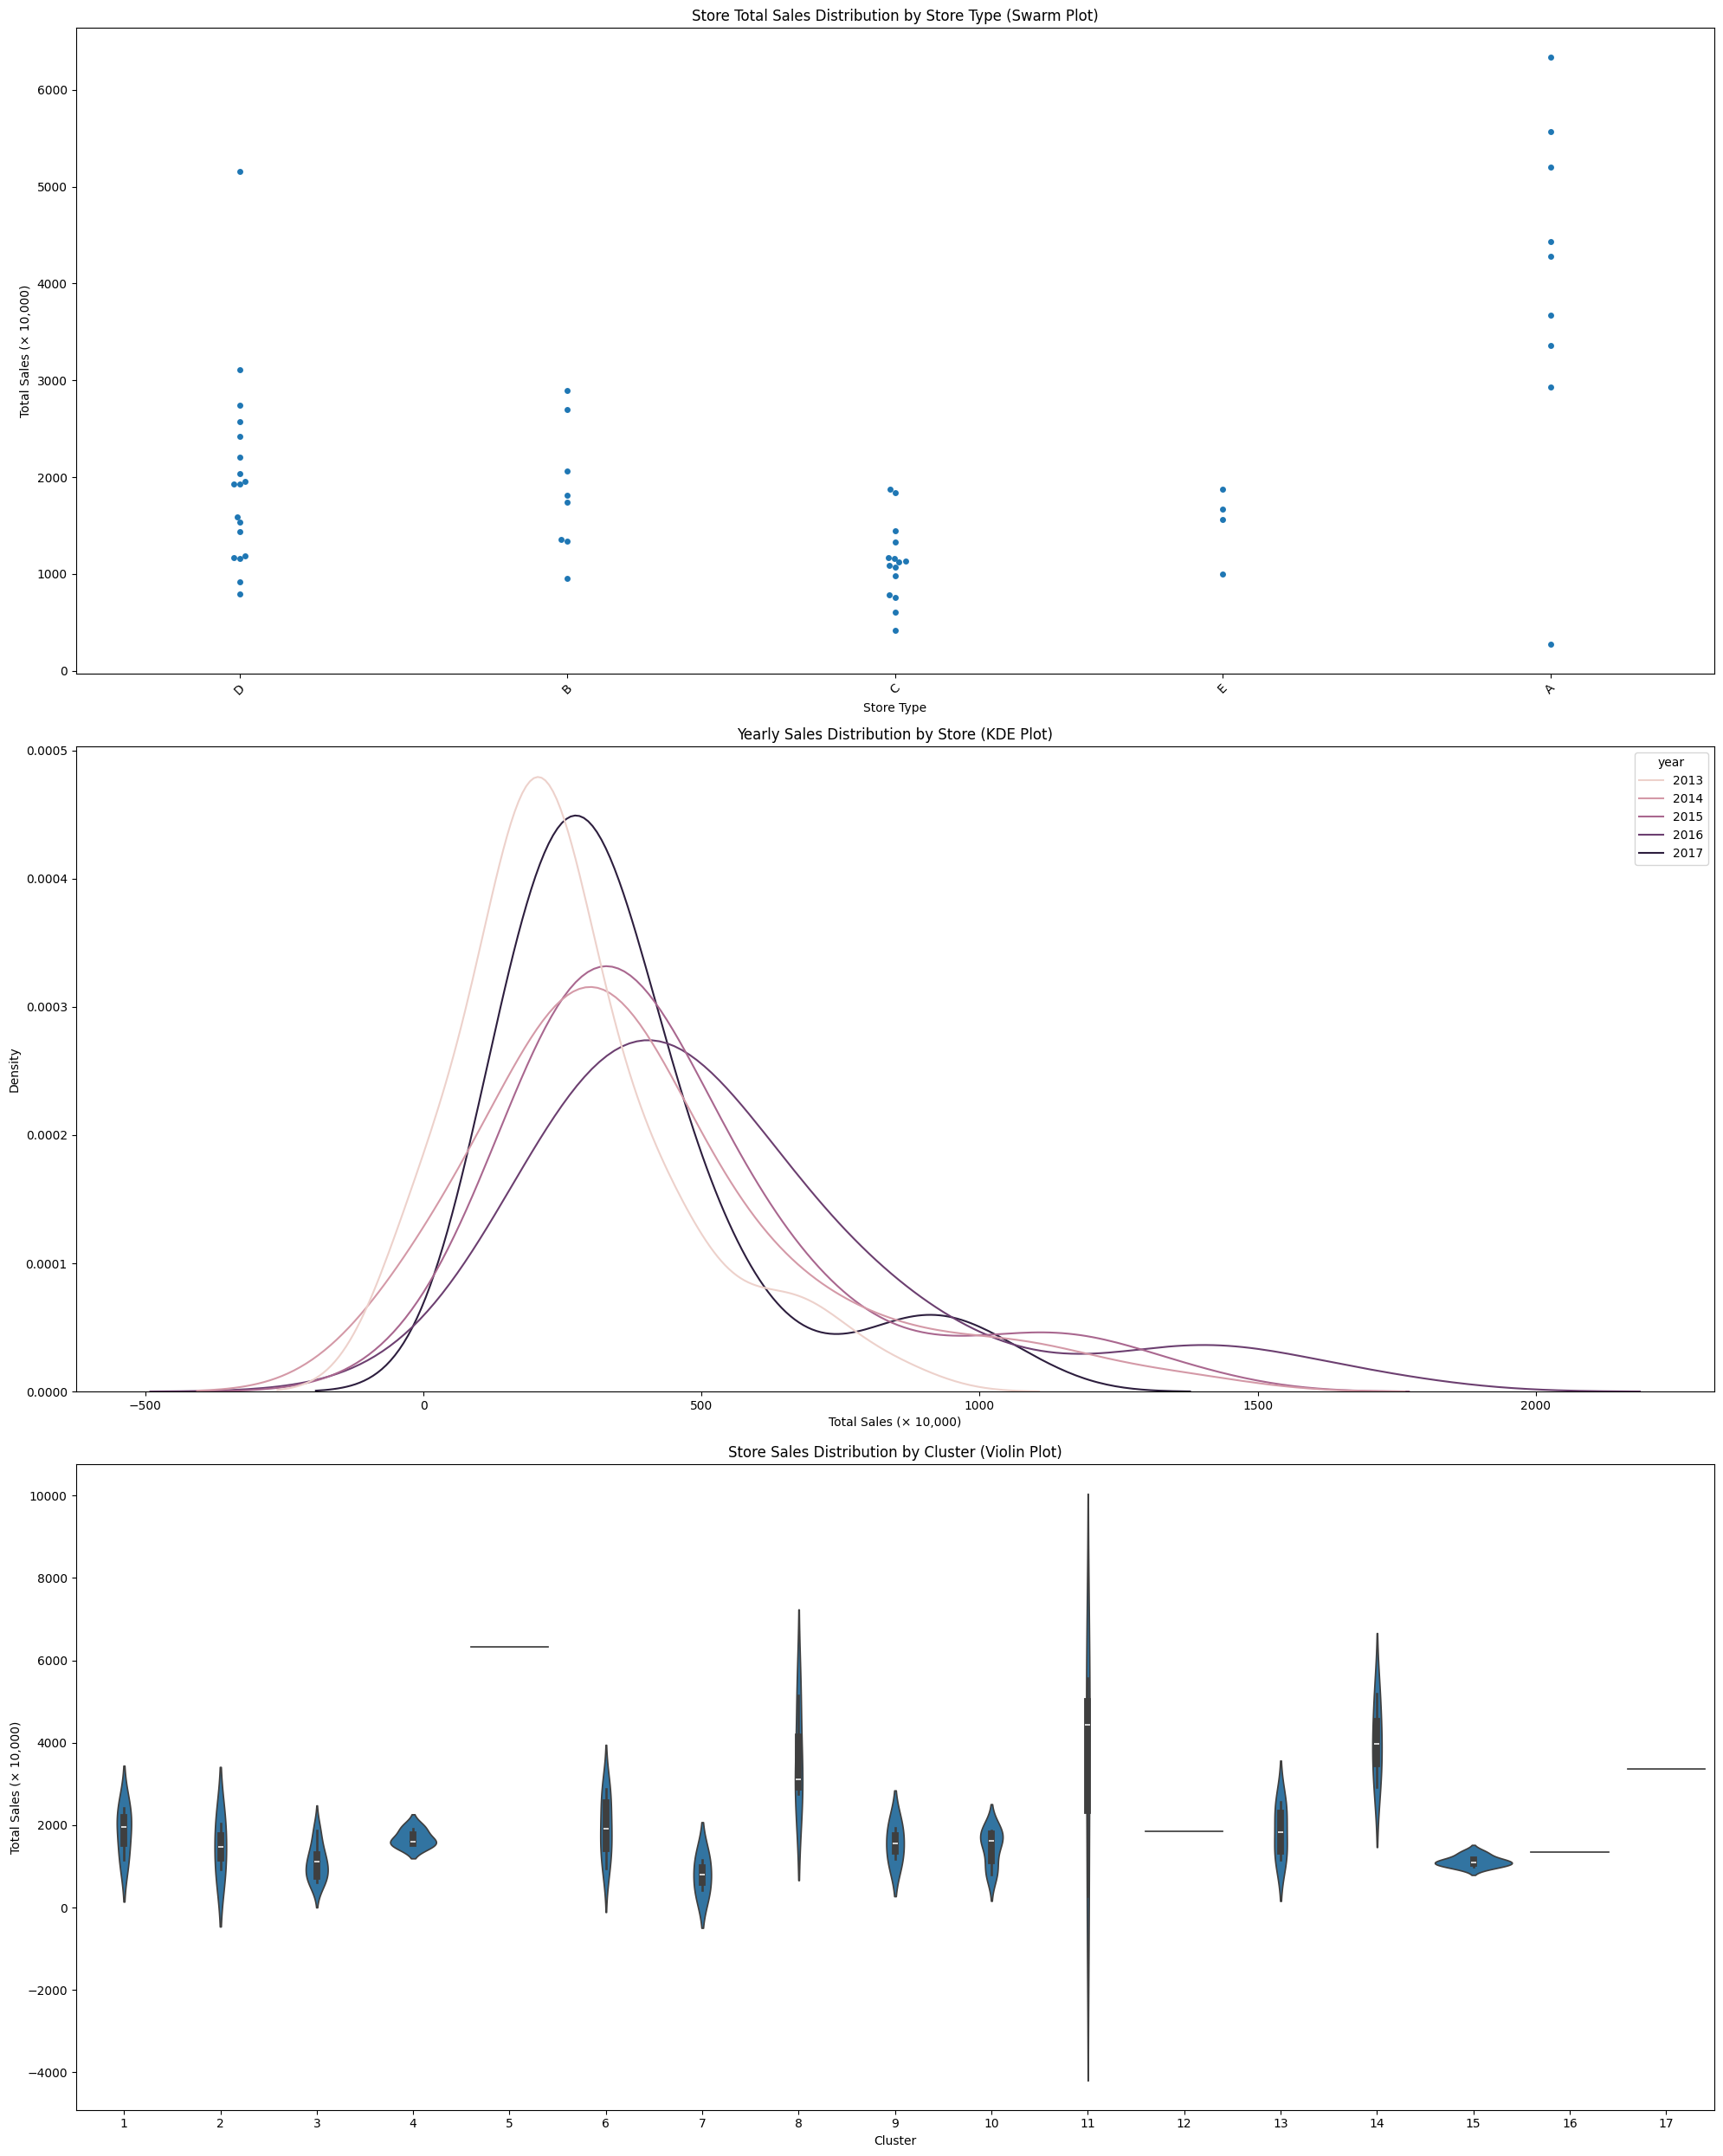

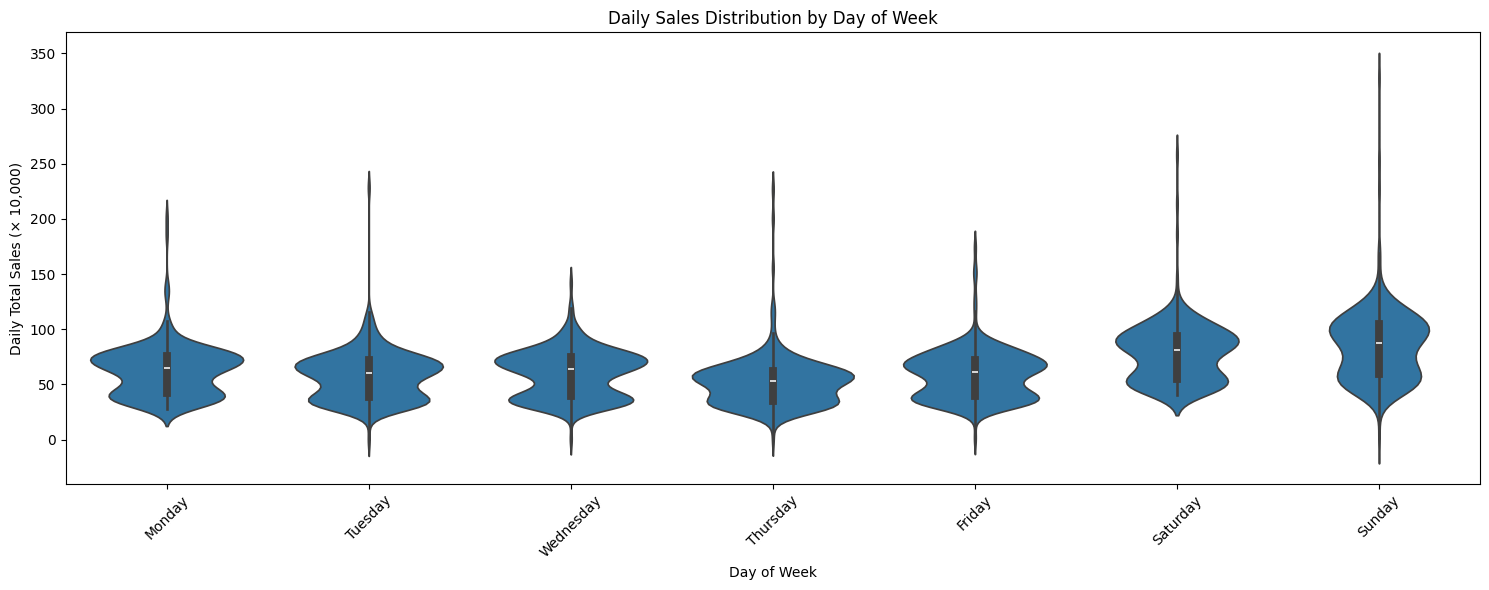


Summary Statistics:
--------------------------------------------------

Top 5 Store Types by Average Sales:
type_x
A    0.070838
D    0.035208
B    0.032828
E    0.027029
C    0.019779
Name: sales, dtype: float64


In [305]:

plot_distributions(final_df)
plot_violin_sales_by_dayofweek(final_df)

### Group plot of sales by family, week and month

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_sales_distributions(df):

    #create histograms for sales grouped by family, week, and month.
    
    # Create week and month features
    df['week'] = df['date'].dt.isocalendar().week
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    # Scale factor for sales (convert to 10,000s ins)
    scale_factor = 10000
    
    # total Sales Distribution by Family
    plt.figure(figsize=(15, 6))
    family_sales = df.groupby('family')['sales'].sum().sort_values(ascending=False) / scale_factor
    
    sns.barplot(x=family_sales.values, y=family_sales.index)
    plt.title('Total Sales by Product Family (in 10,000s)')
    plt.xlabel('Total Sales (× 10,000)')
    plt.ylabel('Family')
    plt.tight_layout()
    plt.show()


def plot_sales_histograms(df):
   #histograms showing sales distribution for different groupings

    
    # scale factor for sales (convert to 10,000s)
    scale_factor = 10000
    
    #set up subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    # Overall Sales Distribution
    daily_sales = df.groupby('date')['sales'].sum() / scale_factor
    sns.histplot(data=daily_sales, bins=50, ax=axes[0,0])
    axes[0,0].set_title('Distribution of Daily Total Sales (in 10,000s)')
    axes[0,0].set_xlabel('Daily Sales (× 10,000)')
    
    # sales sistribution by Week
    weekly_sales = df.groupby(['year', 'week'])['sales'].sum() / scale_factor
    sns.histplot(data=weekly_sales, bins=30, ax=axes[0,1])
    axes[0,1].set_title('Distribution of Weekly Total Sales (in 10,000s)')
    axes[0,1].set_xlabel('Weekly Sales (× 10,000)')
    
    #sales distribution by Month
    monthly_sales = df.groupby(['year', 'month'])['sales'].sum() / scale_factor
    sns.histplot(data=monthly_sales, bins=30, ax=axes[1,0])
    axes[1,0].set_title('Distribution of Monthly Total Sales (in 10,000s)')
    axes[1,0].set_xlabel('Monthly Sales (× 10,000)')
    
    # sales sistribution by Family
    family_sales = df.groupby('family')['sales'].sum() / scale_factor
    sns.histplot(data=family_sales, bins=20, ax=axes[1,1])
    axes[1,1].set_title('Distribution of Total Sales by Family (in 10,000s)')
    axes[1,1].set_xlabel('Total Sales per Family (× 10,000)')
    
    plt.tight_layout()
    plt.show()

    # summary statistics
    print("\nSummary Statistics:")
    print("-" * 50)
    print(f"Average Daily Sales: {daily_sales.mean():.2f} × 10,000")
    print(f"Average Weekly Sales: {weekly_sales.mean():.2f} × 10,000")
    print(f"Average Monthly Sales: {monthly_sales.mean():.2f} × 10,000")
    print("-" * 50)



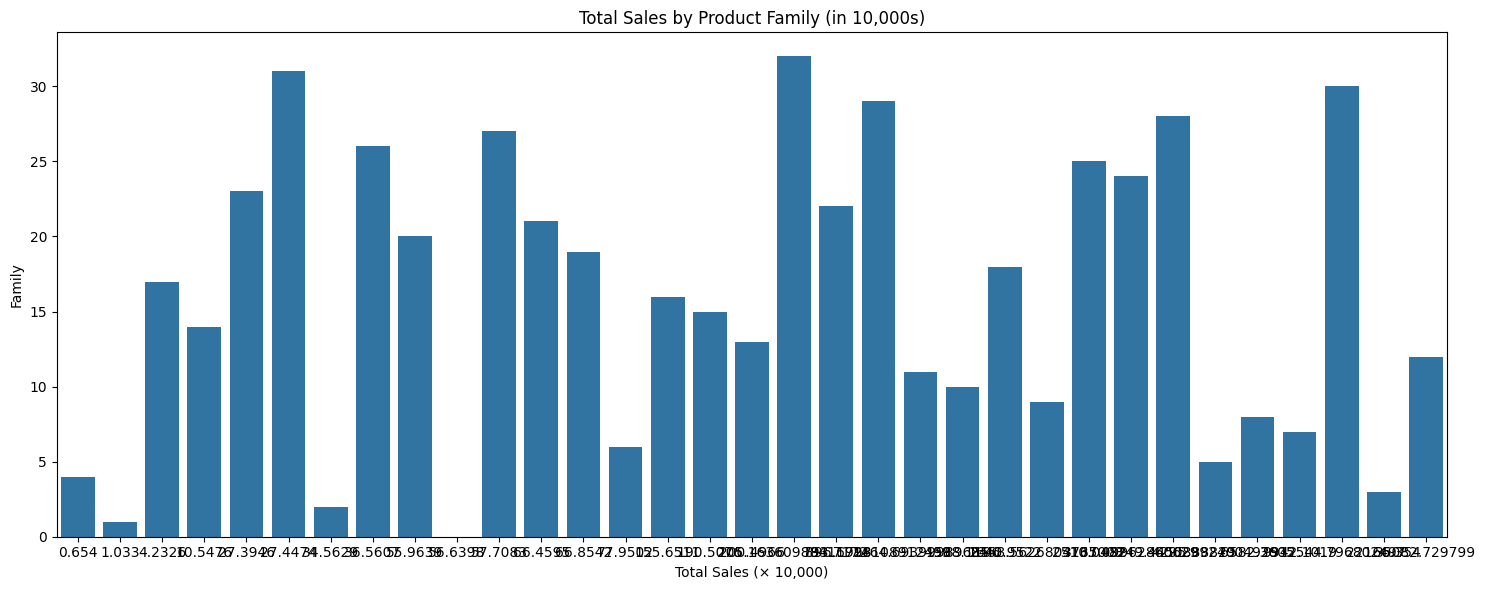

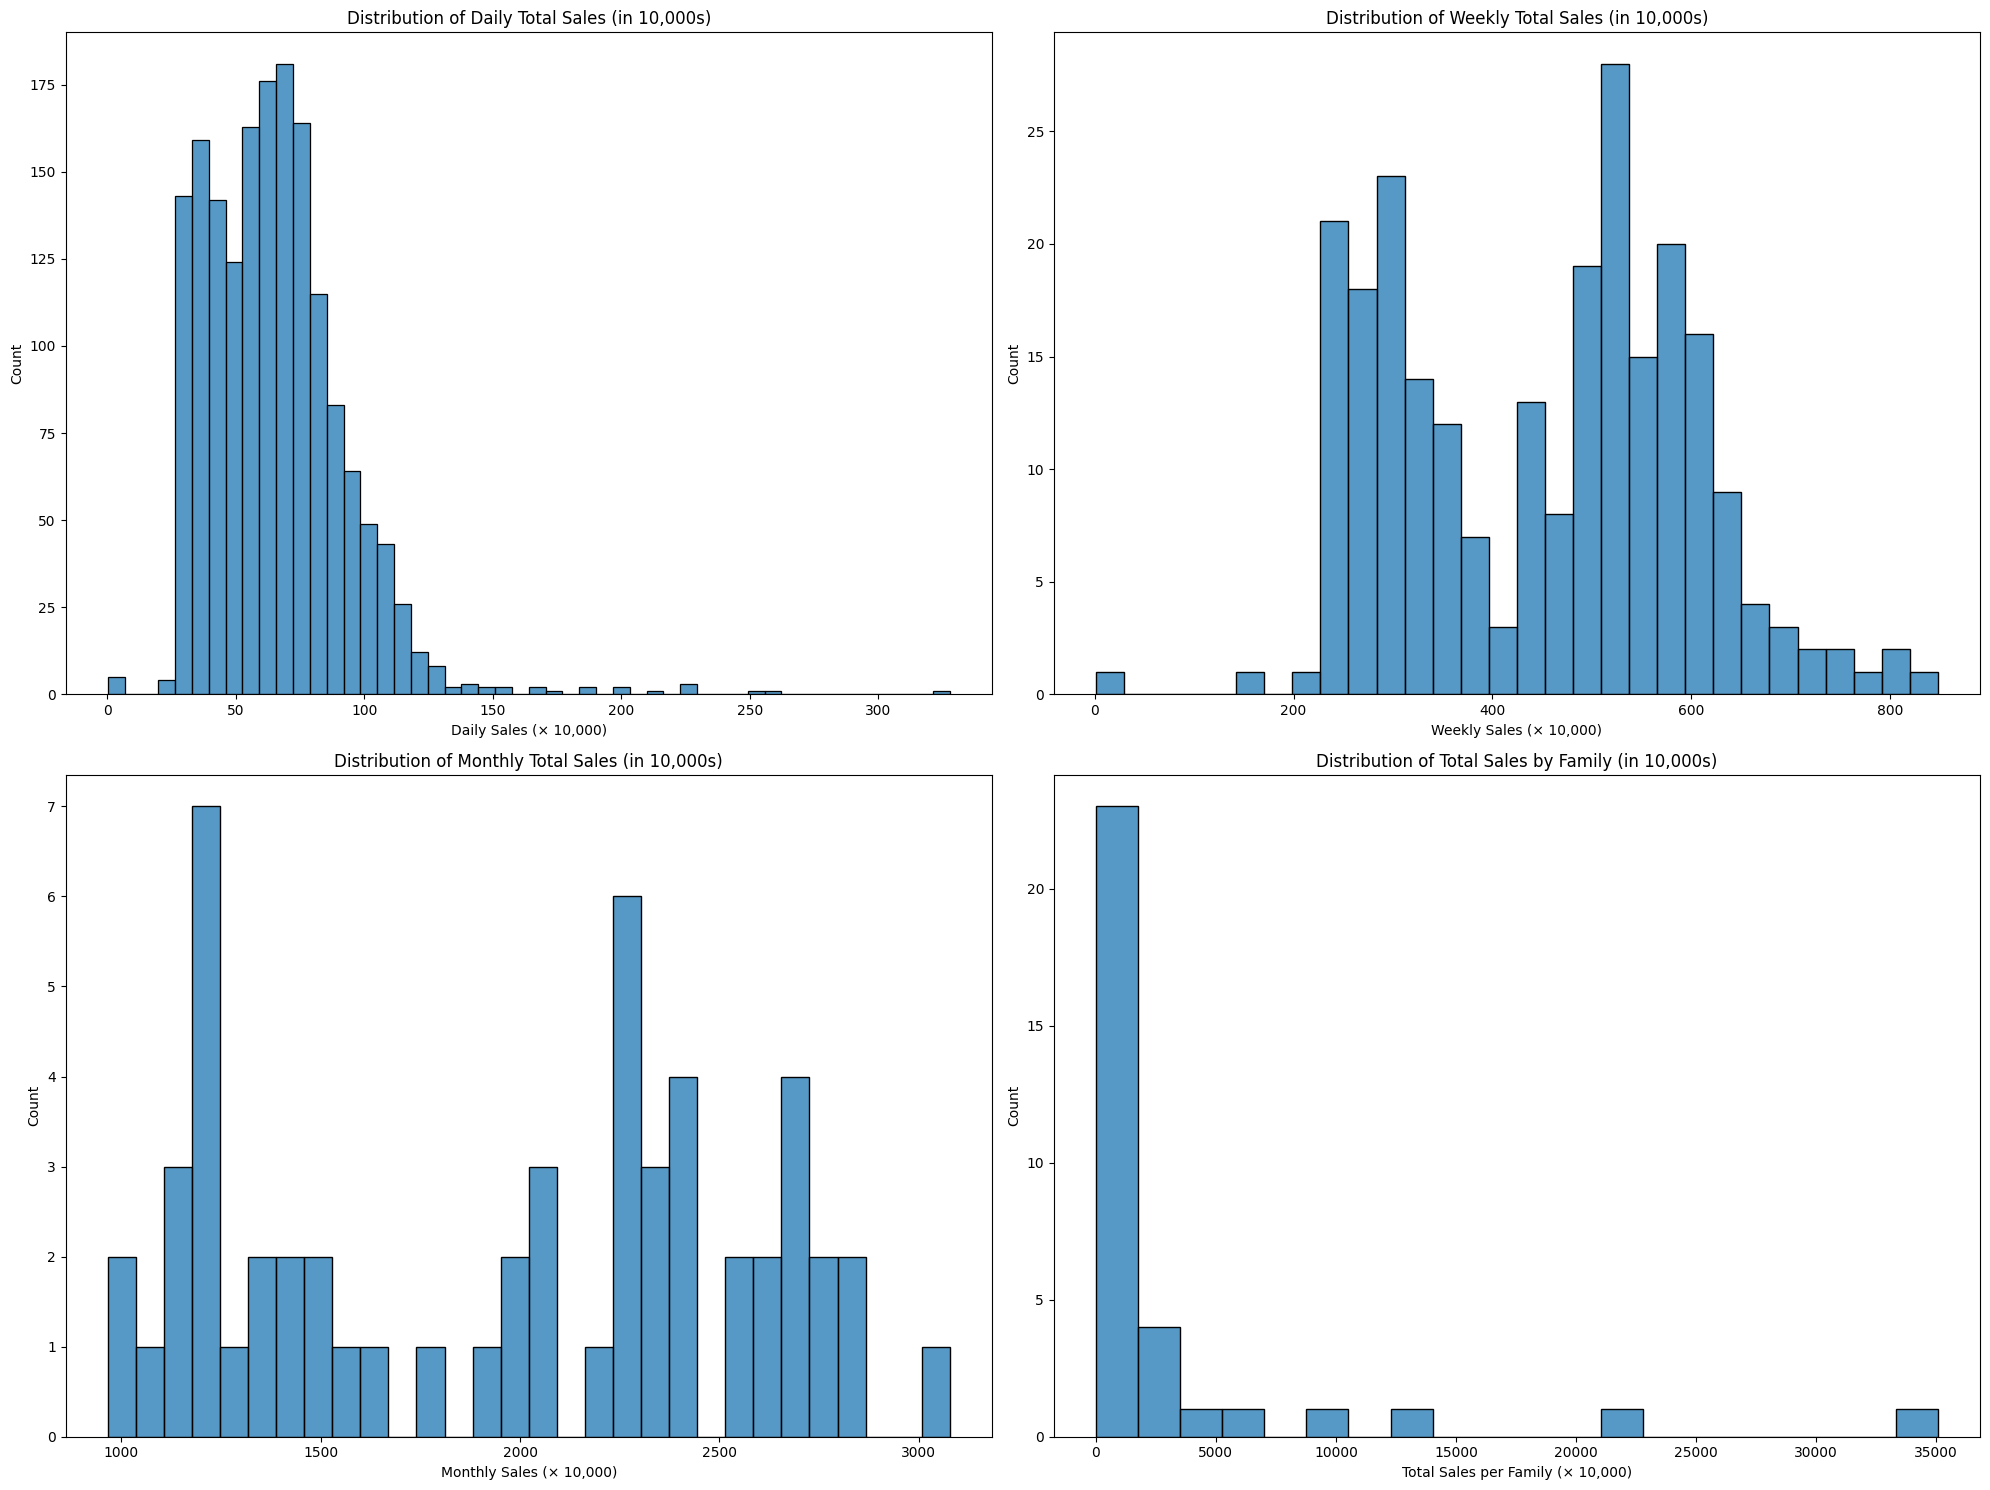


Summary Statistics:
--------------------------------------------------
Average Daily Sales: 65.12 × 10,000
Average Weekly Sales: 449.42 × 10,000
Average Monthly Sales: 1958.17 × 10,000
--------------------------------------------------


In [307]:

plot_sales_distributions(final_df)
plot_sales_histograms(final_df)

### Conclusion

Based on the above visualization and exploratory data analysis of the Favorita store data, we can conclude that the dataset is highly suitable for business decision making. It provides insights which can help in key decisions for operational and strategic planning. The data distribution is not fully normal (has bimodal look) and is having a longer tail to the right i.e its right skewed, the data and visualization show consistent and interpretable patterns that can be used for machine learning models.


The graphs indicate clear performance difference between stores and their locations and the same is evident in store types, shows promotions are not being applied through all the stores and clusters needs to be analyzed to understand why the performance differs so much and this point to multiple areas which can be optimized to increase overall sales performance of the chain.

#### Data Quality and Usability:

- Very clean data , not much cleaning was needed

- There are multiple features and they seem independent of each other

- The data has sufficient variance to draw meaningful insight

- The Key information related to retail like factor(oil price), sales promotions city , state and store type look realistic


#### Distribution Patterns:

- Sales Distributions shows right skewed (long right tail)

- Store type distributions are bimodal (two distinct groups: high-performing A/D vs. others)

- Weekends shows higher sales compared to weekdays

- Cluster distributions show high variability with outliers

- The distribution shows its not fully normal but does have a pattern near to normal with a bimodal tendency which is evident in the violin plots where we could observe two peaks with one bigger than the other


#### Outliers:

- Outliers are noticed in various graphs(cluster 14 shows much higher sales)

- Weekend sales (especially Sunday) show consistently higher sales pattern

- Dec month shows much higher sales for few of the departments

#### Value Ranges:

- Daily Sales: 0 to ~300 × 10,000

- Store Type Sales: 5,000 to 35,000 (in 10,000)

####  Bin Size Impact:

- Daily sales histograms will show better resolution info if the bin sizes are reduced and may show slightly different patterns

- Promotional distributions shows sparse and making bin size smaller could create more sparse visualization


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

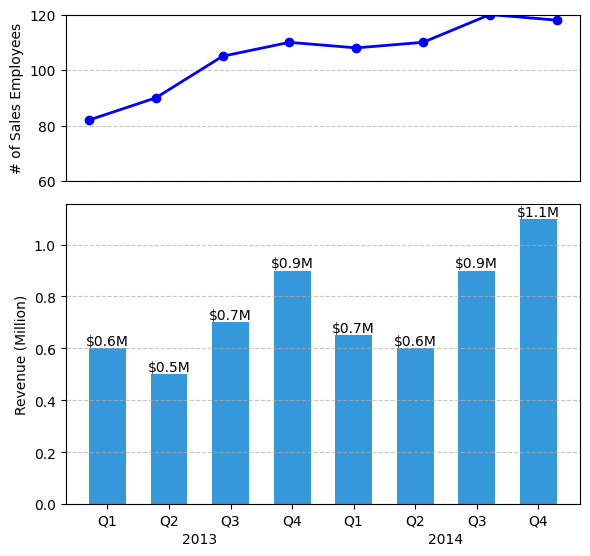

In [308]:
quarters_of_data_collected = pd.date_range(start='2013-01-01', end='2014-12-31', freq='QE')

quarterly_sales_data = {
    'Quarter': quarters_of_data_collected,
    'Sales_Employees': [82, 90, 105, 110, 108, 110, 120, 118],  
    'Revenue_Millions': [0.6, 0.5, 0.7, 0.9, 0.65, 0.6, 0.9, 1.1]   
}

df = pd.DataFrame(quarterly_sales_data)  # Uncommented this line as it's needed

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), height_ratios=[1, 1.8])

# Plot line graph on top subplot
ax1.plot(range(len(df)), df['Sales_Employees'], 'bo-', linewidth=2)
ax1.set_ylabel('# of Sales Employees')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(60, 120)
ax1.set_xticks([])

# plot bar graph on the bottom subplot
bars = ax2.bar(range(len(df)), df['Revenue_Millions'], color='#3498db', width=0.6)
ax2.set_ylabel('Revenue (Million)')
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')

# customizing the x-axis labels
ax2.set_xticks(range(len(df)))
ax2.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'] * 2)  # Just quarters

# adding year labels centered under each group of quarters dynamically base don the amount of data collecteed in quarters_of_data_collected
years = df['Quarter'].dt.year.unique()
quarters_per_year = len(df) // len(years)
for i, year in enumerate(years):
    center_pos = (i * quarters_per_year) + (quarters_per_year / 2) - 0.5
    ax2.text(center_pos, -0.15, str(year), ha='center', transform=ax2.transData)

# adding the value on the bar  gives clarity though its not there in original graph in the book
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M',
             ha='center', va='bottom')

# adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, bottom=0.15)  # Added bottom space for year labels

plt.show()